## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---

> __In the paper we used the actual, rather than synthetic demand. We used albatross Dutch datasets.__

> __You can see how transform your macroscopic OD matrices into the ExMAS microscopic trip request in `ExMAS_utils.load_albatross_csv` or contact me__


### Synthetic demand generation

-----

We generate `params.nP` trip requests (`inData.requests`).

Requests are defined through:
* origin (node of `inData.G` graph)
* destinations (node of `inData.G` graph)
* treq (requested departure time)

----

* origins are drawn from random distribution `math.exp(_params.demand_structure.origins_dispertion*x))`, where `x` is distance from `inData.networkStats.center` (in meters)
* destinations similarly, yet with `_params.demand_structure.destinations_dispertion`
* treq is drawn from uniform distribution between $[t0-T/2,t0+T/2]$, where $t0$ is `params.t0` and $T$ is `params.simTime' (optionally normal distribution may be applied, but it seems impractical)

----

We use function `generate_demand` from `dataStructures.ipynb` to generate the demand

We visualize the demand with `plot_demand` from `utils/plot_utils.ipynb`

----

* `dist` of requerst is given im meters
* `ttrav` of request is either calculated as dist divided by `params.avg_speed` (in [m/s]) or estimated using real-time data (in general travel times shall be estimarted within current study using givwen assumption on trip time and speed).



In [1]:
import os
import pprint
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/MM/MM.json') # load the default 

### syntehtic demand parameterization

In [5]:
params.nP #number of passengers

1000

In [6]:
params.city

'Amsterdam, Netherlands'

In [7]:
params.simTime # demand simulation time [hours]

1

In [8]:
params.demand_structure.destinations_dispertion # controls how destinations are dispersed from center (see negative exponenetial decay function in ExMAS_utils.generate_demand)

-0.001

In [9]:
params.demand_structure.origins_dispertion # controls how origins are dispersed from center

-0.0003

In [10]:
pprint.pprint(params.demand_structure)

{'destinations_dispertion': -0.001,
 'origins_dispertion': -0.0003,
 'temporal_dispertion': 0.3,
 'temporal_distribution': 'uniform'}


2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [11]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [12]:
inData = ExMAS.utils.generate_demand(inData, params)

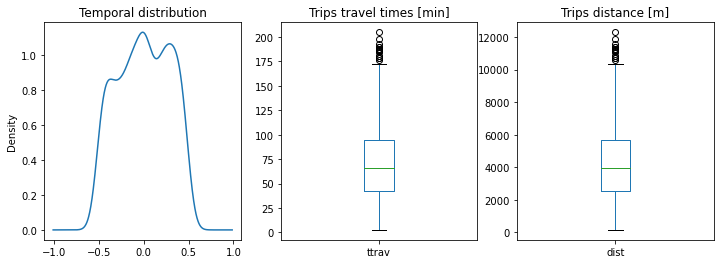

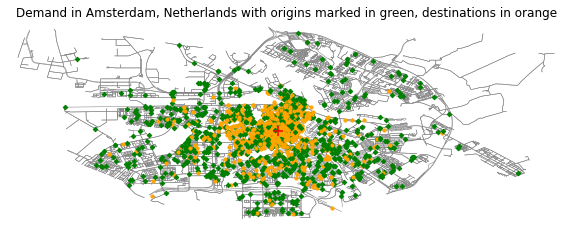

In [13]:
ExMAS.utils.plot_demand(inData, params)

<AxesSubplot:title={'center':'Trip distances'}, ylabel='Frequency'>

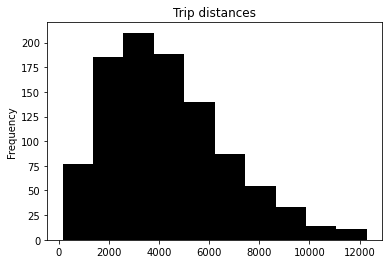

In [14]:
inData.requests.dist.plot(kind='hist',title='Trip distances',color='black')

<AxesSubplot:title={'center':'Origin distances to center'}, ylabel='Frequency'>

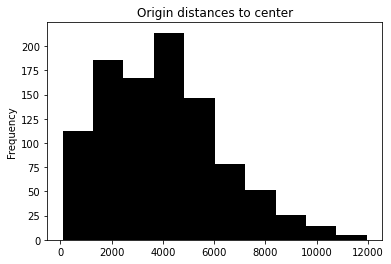

In [15]:
inData.skim[inData.stats['center']][inData.requests.origin].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

<AxesSubplot:title={'center':'Origin distances to center'}, ylabel='Frequency'>

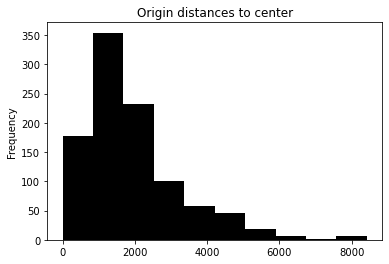

In [16]:
inData.skim[inData.stats['center']][inData.requests.destination].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

##### store as geopandas csvgeorequests = ExMAS.utils.requests_to_geopandas(inData, filename = 'georequests.csv')

In [17]:
georequests = ExMAS.utils.requests_to_geopandas(inData, filename = 'ExMAS/spinoffs/MM/georequests.csv')

In [18]:
georequests.sample(5)

,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,Point_o,origin_x,origin_y,Point_d,destination_x,destination_y
619,3294946428,6206420405,2020-10-29 15:27:07,NaN,00:32:01,2020-10-29 15:59:08,NaN,1921,619,POINT (4.86001 52.37144),4.860007,52.371441,POINT (4.8785137 52.3643882),4.878514,52.364388
79,997996379,46351147,2020-10-29 14:39:50,NaN,02:00:23,2020-10-29 16:40:13,NaN,7223,79,POINT (4.77900 52.35800),4.778998,52.357997,POINT (4.86683 52.3636238),4.866830,52.363624
766,46441440,290970655,2020-10-29 15:07:46,NaN,02:05:36,2020-10-29 17:13:22,NaN,7536,766,POINT (4.80383 52.38322),4.803826,52.383219,POINT (4.8073666 52.3342421),4.807367,52.334242
150,3898433632,46415272,2020-10-29 15:26:54,NaN,01:28:58,2020-10-29 16:55:52,NaN,5338,150,POINT (4.87042 52.34077),4.870419,52.340767,POINT (4.8615853 52.3776521),4.861585,52.377652
169,46458123,46424018,2020-10-29 14:37:20,NaN,00:19:46,2020-10-29 14:57:06,NaN,1186,169,POINT (4.88343 52.38715),4.883430,52.387153,POINT (4.8755208 52.3795405),4.875521,52.379540


---
(c) Rafał Kucharski, Delft, 2020